# Multiple Linear Regression
## Boom Bike Case Study

#### Problem Statement:
BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. Company decided after Covid, they want to understand the factors affecting the demand for these shared bikes in the American market.
Company Want to know the following details

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


In [5073]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [5074]:
import numpy as np
import pandas as pd

In [5075]:
day = pd.read_csv("day.csv")

In [5076]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5077]:
#inspect the various aspect of dataframe
day.shape

(730, 16)

In [5078]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5079]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Preprocessing the data

Now understand the column and data. Lets clean the data

- We can remove two columns, these  columns are irrevelent in the perspective the features


In [5080]:
columns_to_drop = ['casual', 'registered','dteday','instant']
day = day.drop(columns=columns_to_drop)

## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

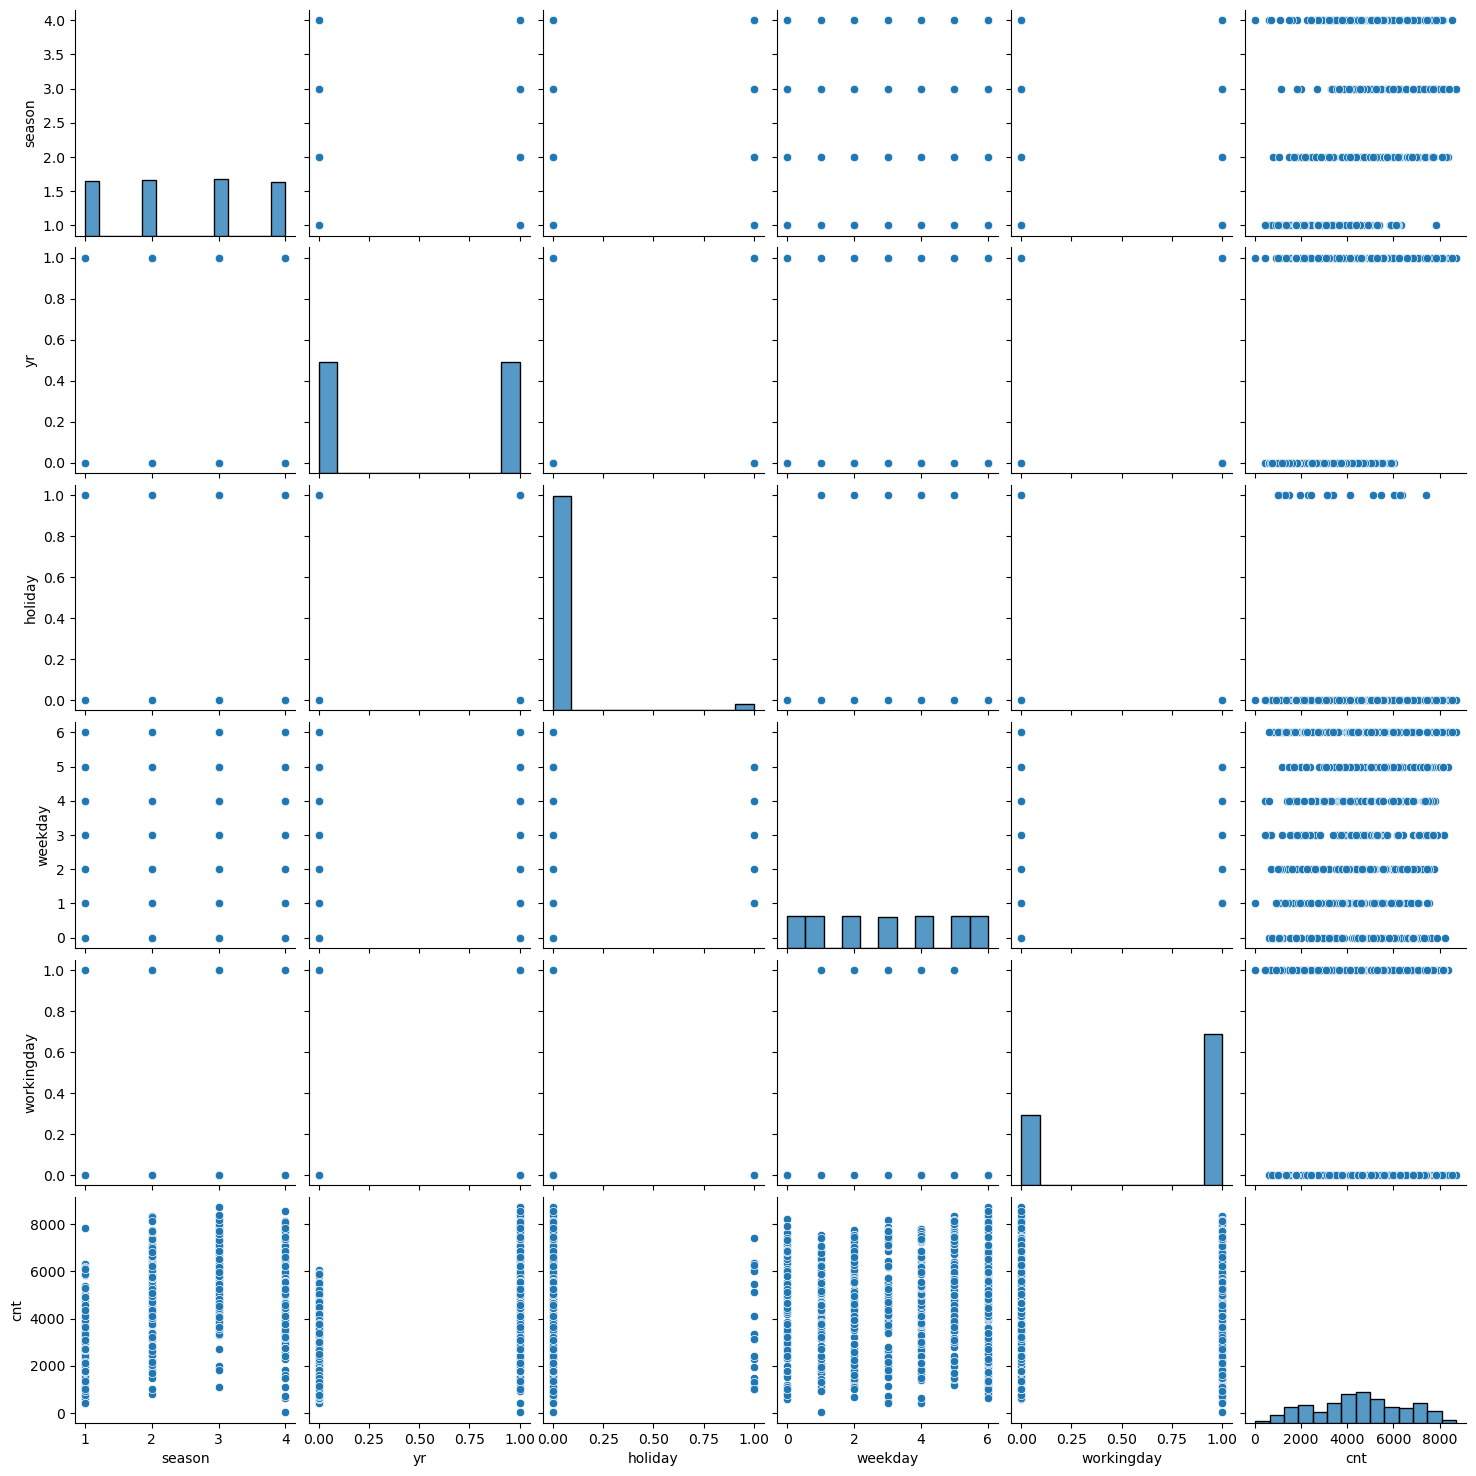

Second set


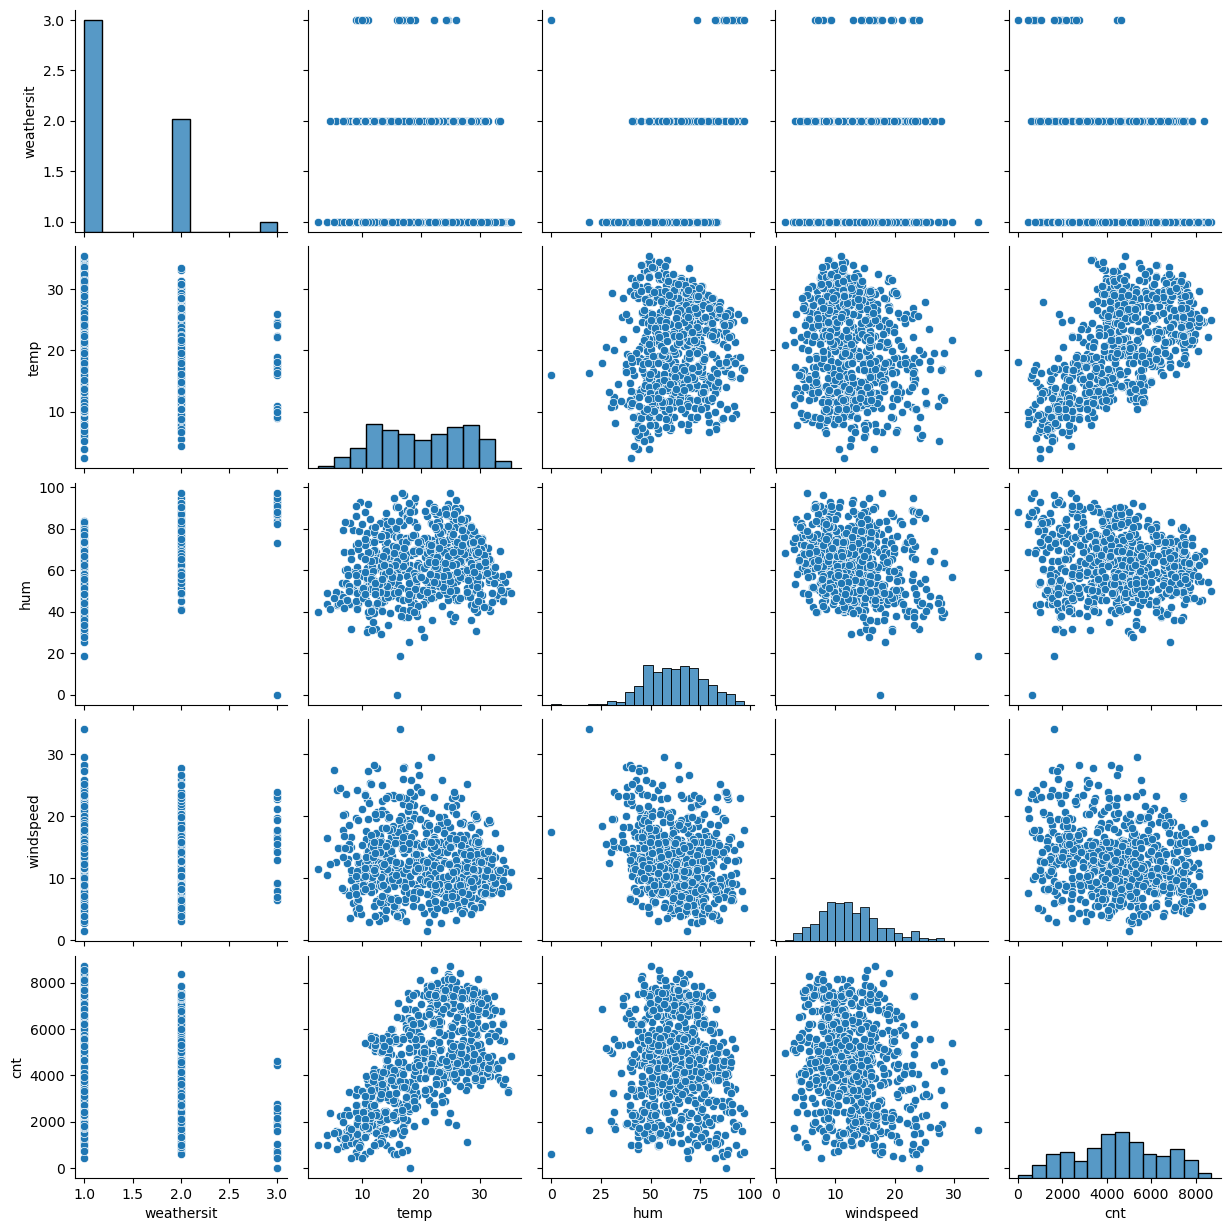

In [5081]:
#divide the column in to two sets  to plot the graph to get proper visualization
#casuals and registered is not a feature so we need not want t oconsider this
selected_column=["season","yr","holiday","weekday","workingday","cnt"]
sns.pairplot(day[selected_column])
plt.show()
print('Second set')
selected_column=["weathersit","temp","hum","windspeed","cnt"]
sns.pairplot(day[selected_column])
plt.show()

#### Visualising Categorical Variables

Let's make a boxplot  of these categorical variables

In [5082]:
import matplotlib.pyplot as plt
import seaborn as sns


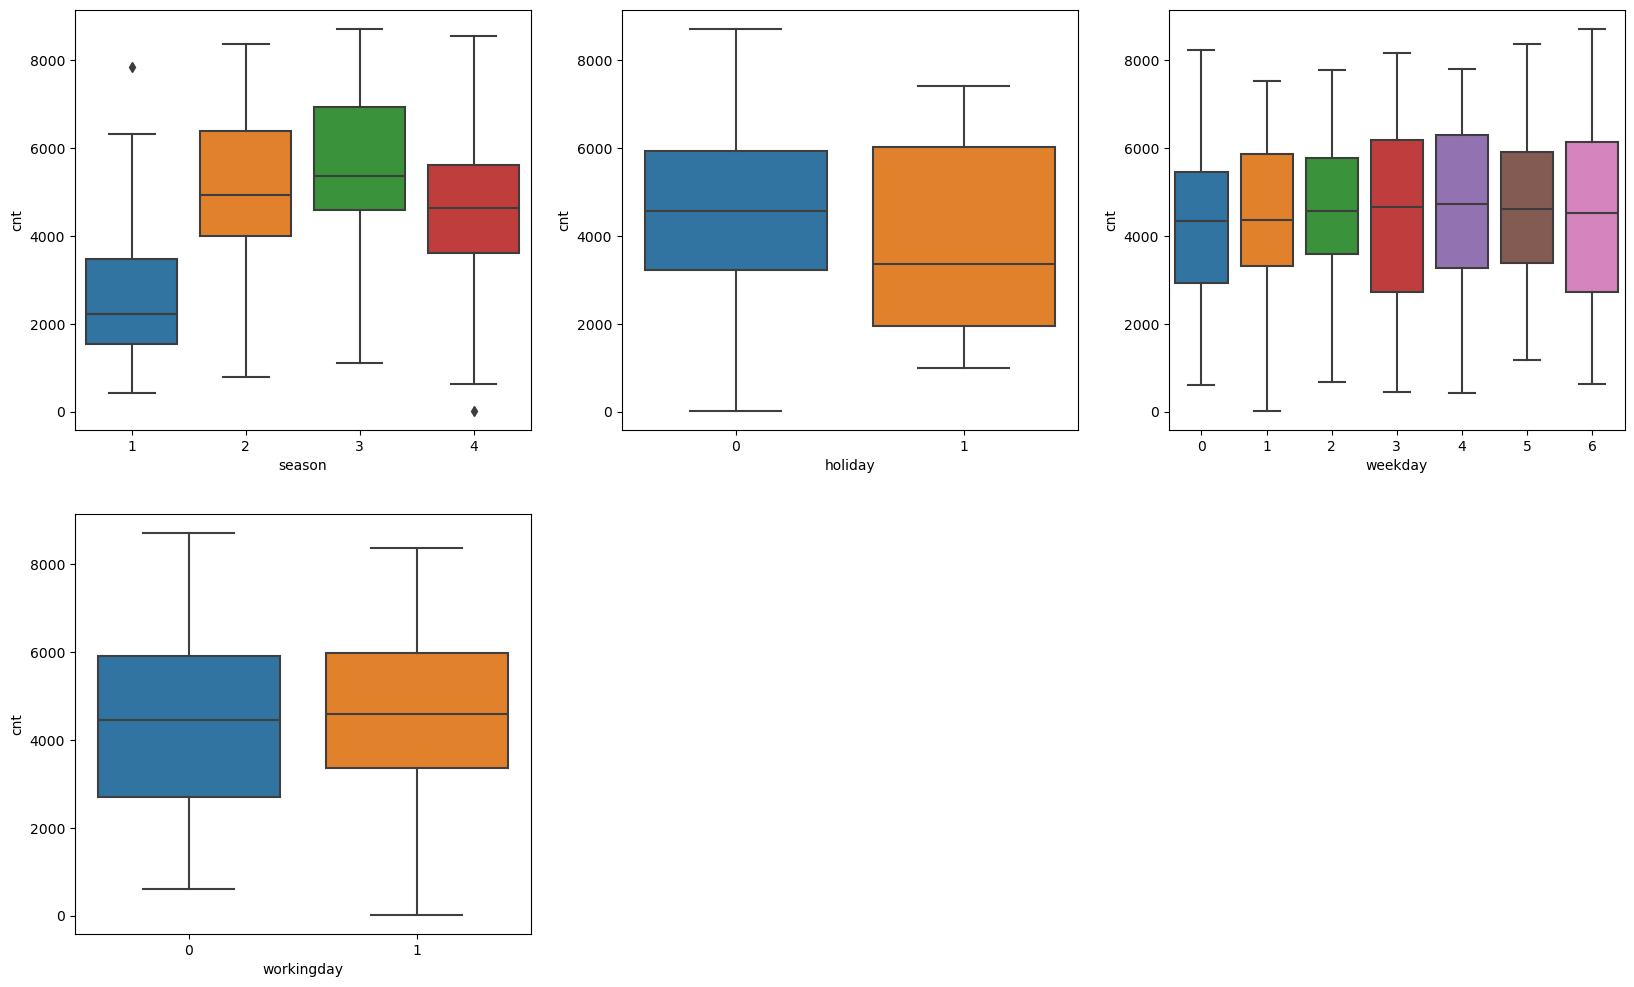

In [5083]:
plt.figure(figsize=(20, 12))
#"weathersit","temp","hum","windspeed","cnt","season","yr","holiday","weekday","workingday","cnt"]
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. 
Below is the plot for `season` with `weathersit` as the hue.

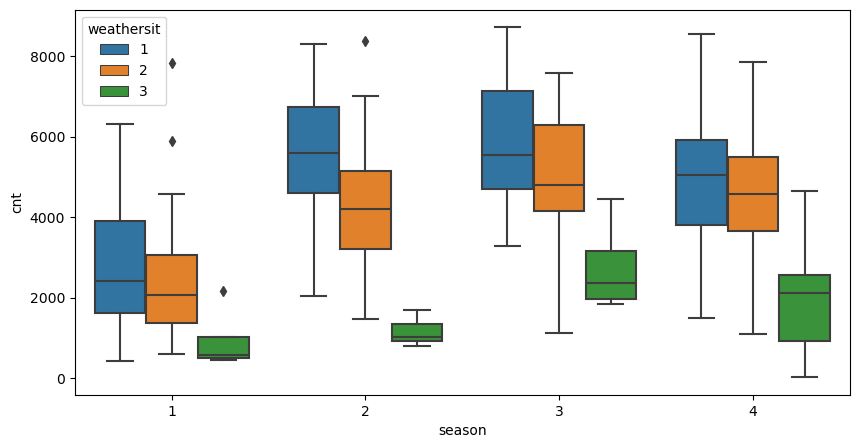

In [5084]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = day)
plt.show()

## Step 4: Data Preparation

the variable Season has four levels. We need to convert these levels into respective dummy.

For this, we will use something called dummy variables.

In [5085]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'dummy'
#I Chaged 1-gs(good season)-2(OK season),3(medium season),4(bad season)
dummy = pd.get_dummies(day['season'],drop_first = True).astype(int)
dummy.columns = [ 'summer', 'fall','winter']


In [5086]:
# Check what the dataset 'seasondumy' looks like
dummy.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


If the level is n thne n-1 columns, we don't need three columns. We can drop the season column, as the type of season can be identified with just the last two columns where shed

In [5087]:
#Add the result to data frame
day = pd.concat([day, dummy], axis = 1)

In [5088]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [5089]:
#drop the existing season column 
day.drop(['season'], axis = 1, inplace = True)


## Step 5: Splitting the Data into Training and Testing Sets
   we have split the data into training and testing 

In [5090]:
from sklearn.model_selection import train_test_split

# Reproducibility is essential in situations where you want others to obtain the same
# results as you or when debugging, testing, or sharing code
df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 
Column from yr to weatherlist is very small value  temp to count is high value so we need to rescale the columns
In regression models, when comparing the coefficients of different features, rescaling ensures that the coefficients are on a comparable scale, aiding in the interpretation of their relative importance

we will use MinMax scaling.

In [5091]:
from sklearn.preprocessing import MinMaxScaler

In [5092]:
scaler = MinMaxScaler()

In [5093]:
# Apply scaler() to all the columns except the 'yes-no',date and 'dummy' variables
#temp,atemp,hum,windspeed,cnt
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt','weekday','mnth','weekday']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [5094]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [5095]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
653,1,0.818182,0,0.333333,1,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1
576,1,0.545455,0,0.333333,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0
426,1,0.181818,0,1.000000,0,2,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0
728,1,1.000000,0,0.000000,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0
482,1,0.272727,0,1.000000,0,2,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0


In [5096]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,1.401961,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.547540,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,1.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,2.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


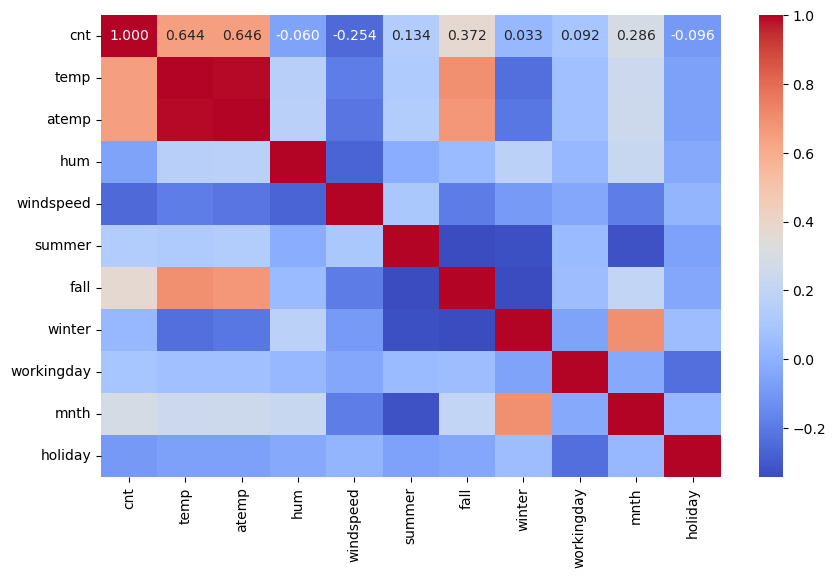

In [5097]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10,6))
cor_variable=['cnt','temp','atemp','hum','windspeed','summer','fall','winter','workingday','mnth','holiday']
sns.heatmap(df_train[cor_variable].corr(), annot = True, cmap='coolwarm', fmt=".3f",annot_kws={"size": 10})
plt.show()

As you might have noticed, `cnt ` seems to the correlated to `temparature` the most. Let's see a pairplot for `cnt` vs `temparature`.

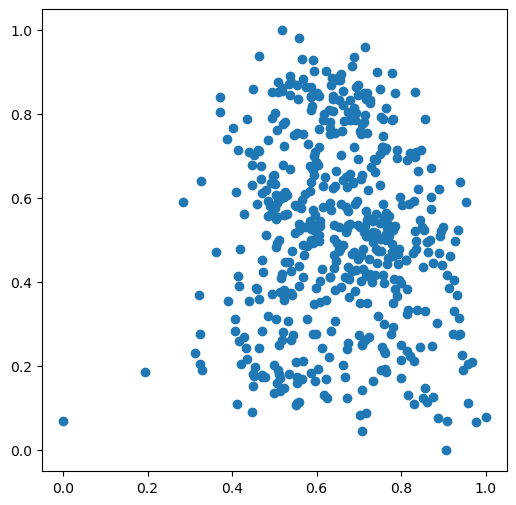

In [5098]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.hum , df_train.cnt)
plt.show()

So, I pick temparature as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [5099]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 6: Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X.

In [5100]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [5101]:
# Check the parameters obtained

lr.params

const    0.169798
temp     0.639952
dtype: float64

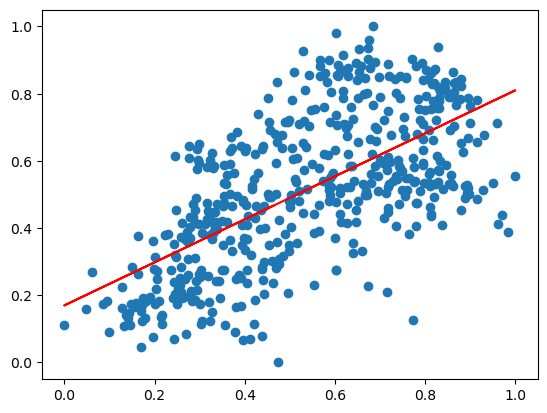

In [5102]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.170 + 0.640*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [5103]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           5.80e-61
Time:                        22:03:12   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

### Adding another variable

The R-squared value obtained is `0.414`. So let's go ahead and add the second most highly correlated variable, i.e. `fall`.

In [5104]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp','weekday']]

In [5105]:
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const      0.158042
temp       0.640110
weekday    0.023419
dtype: float64

In [5106]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     180.1
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           8.12e-60
Time:                        22:03:14   Log-Likelihood:                 175.38
No. Observations:                 510   AIC:                            -344.8
Df Residuals:                     507   BIC:                            -332.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1580      0.023      6.951      0.0

In [5107]:
# Assign all the feature variables to X
X_train_lm = X_train[['temp', 'weekday','summer']]
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const      0.154433
temp       0.633254
weekday    0.023960
summer     0.028649
dtype: float64

In [5108]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     121.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           3.41e-59
Time:                        22:03:15   Log-Likelihood:                 176.67
No. Observations:                 510   AIC:                            -345.3
Df Residuals:                     506   BIC:                            -328.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1544      0.023      6.770      0.0

### Adding all the variables to the model

In [5109]:
# Check all the columns of the dataframe

day.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', 'summer', 'fall', 'winter'],
      dtype='object')

In [5110]:
#Build a linear model
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const         0.253523
yr            0.234201
mnth          0.013874
holiday      -0.062950
weekday       0.049423
workingday    0.018762
weathersit   -0.080294
temp          0.402455
atemp         0.088601
hum          -0.114793
windspeed    -0.187401
summer        0.117063
fall          0.069112
winter        0.149612
dtype: float64

In [5111]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     182.0
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          3.40e-179
Time:                        22:03:17   Log-Likelihood:                 485.41
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     496   BIC:                            -883.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2535      0.028      9.036      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [5112]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5113]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,temp,385.42
7,atemp,362.83
8,hum,26.26
1,mnth,13.81
5,weathersit,12.75
11,fall,8.17
12,winter,7.16
9,windspeed,4.10
10,summer,3.51
4,workingday,3.14


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp' as it has a very high p-value of `0.938`. Let's go ahead and drop this variabless

In [5114]:
# Dropping highly correlated variables and insignificant variables
#removed fields=weathersit(DN),hum(dn)
X = X_train.drop('atemp', axis=1)

In [5115]:
#Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_1= sm.OLS(y_train, X_train_lm).fit()

In [5116]:
# Print the summary of the model

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     197.3
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          2.85e-180
Time:                        22:03:23   Log-Likelihood:                 485.21
No. Observations:                 510   AIC:                            -944.4
Df Residuals:                     497   BIC:                            -889.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2551      0.028      9.138      0.0

In [5117]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,hum,25.86
6,temp,22.07
1,mnth,13.80
5,weathersit,12.72
10,fall,8.05
11,winter,7.16
8,windspeed,3.97
9,summer,3.51
4,workingday,3.14
3,weekday,3.05


In [5118]:
#ropping highly vif variables and insignificant variables dropping those

X = X.drop('mnth', axis=1)

In [5119]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [5120]:
# Print the summary of the model

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.6
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          2.18e-181
Time:                        22:03:27   Log-Likelihood:                 485.07
No. Observations:                 510   AIC:                            -946.1
Df Residuals:                     498   BIC:                            -895.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2565      0.028      9.231      0.0

In [5121]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,24.96
5,temp,21.97
4,weathersit,12.65
9,fall,6.44
7,windspeed,3.95
8,summer,3.35
3,workingday,3.14
2,weekday,3.03
10,winter,2.47
0,yr,2.03


In [5122]:
#ropping highly correlated variables and insignificant variables

X = X.drop('fall', axis=1)

In [5123]:
#Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [5124]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     230.6
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          6.14e-180
Time:                        22:03:30   Log-Likelihood:                 478.82
No. Observations:                 510   AIC:                            -935.6
Df Residuals:                     499   BIC:                            -889.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2482      0.028      8.865      0.0

In [5125]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,23.99
4,weathersit,12.49
5,temp,7.44
7,windspeed,3.81
3,workingday,3.13
2,weekday,3.03
0,yr,2.01
9,winter,1.63
8,summer,1.51
1,holiday,1.09


In [5126]:
X = X.drop('hum', axis=1)

In [5127]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.6
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          5.63e-179
Time:                        22:03:32   Log-Likelihood:                 473.68
No. Observations:                 510   AIC:                            -927.4
Df Residuals:                     500   BIC:                            -885.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1930      0.022      8.696      0.0

In [5128]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,weathersit,5.86
5,temp,4.87
6,windspeed,3.79
3,workingday,3.05
2,weekday,3.00
0,yr,2.01
7,summer,1.50
8,winter,1.47
1,holiday,1.07


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [5130]:
y_train_cnt = lr_4.predict(X_train_lm)

Text(0.5, 0, 'Errors')

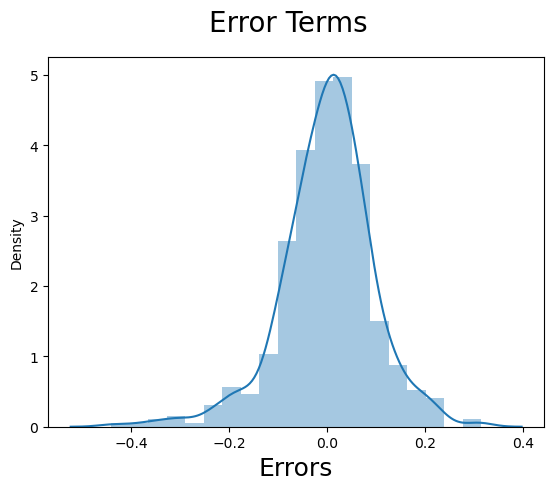

In [5131]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [5132]:
df_test.head()
num_vars=['temp', 'atemp', 'hum', 'windspeed', 'cnt','weekday','mnth','weekday']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [5133]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,0.036530,3.018265,0.698630,1.374429,20.815737,24.255828,61.961883,12.600130,4546.981735,0.264840,0.246575,0.232877
std,0.500722,3.421875,0.188034,1.988415,0.459904,0.538843,7.689600,8.299641,14.456669,4.984858,1898.633630,0.442259,0.432005,0.423633
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3.957390,4.941955,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,14.093750,17.085500,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,20.807500,24.873150,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,27.401653,31.155725,72.192050,15.395629,5869.500000,1.000000,0.000000,0.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,34.815847,41.318550,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000


In [5134]:
df_test.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
184,0,7.0,1,1.0,0,2,29.793347,33.27085,63.7917,5.459106,6043.0,0,1,0
535,1,6.0,0,3.0,1,1,32.082500,36.04875,59.2083,7.625404,6211.0,1,0,0
299,0,10.0,0,4.0,1,2,19.270000,22.85230,81.2917,13.250121,2659.0,0,0,1
221,0,8.0,0,3.0,1,1,31.433347,34.24915,42.4167,13.417286,4780.0,0,1,0
152,0,6.0,0,4.0,1,1,29.315000,32.19710,30.5000,19.583229,4968.0,1,0,0


#### Dividing into X_test and y_test

In [5135]:
y_test = df_test.pop('cnt')
X_test = df_test

In [5136]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [5137]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m4.head()
X_test_m4 = X_test_m4.drop(["atemp", "hum", "mnth","fall"], axis = 1)


In [5138]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

X_test_m4.head()




,const,yr,holiday,weekday,workingday,weathersit,temp,windspeed,summer,winter
184,1.0,0,1,1.0,0,2,29.793347,5.459106,0,0
535,1.0,1,0,3.0,1,1,32.082500,7.625404,1,0
299,1.0,0,0,4.0,1,2,19.270000,13.250121,0,1
221,1.0,0,0,3.0,1,1,31.433347,13.417286,0,0
152,1.0,0,0,4.0,1,1,29.315000,19.583229,1,0


In [5139]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred_m4)
r_squared

-5.733374717129812

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

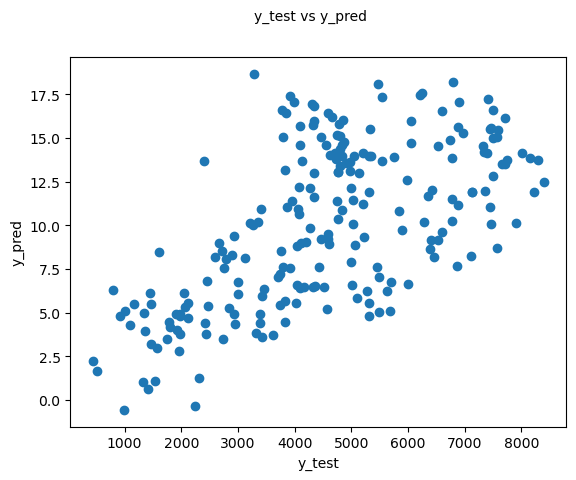

In [5140]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 10)              # Plot heading 
plt.xlabel('y_test', fontsize = 10)                          # X-label
plt.ylabel('y_pred', fontsize = 10)